# Transmission spectra: full

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/ngr81uubrouo8nk/AACrisaNEnLdxDwwosdX1Edva?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Finish set-up

In [3]:
# Link dirs
! ln -srf data/detrended_binned_lcs data/tspec_full

## Load

In [52]:
base_dir = "data/detrended/out_l_C/WASP50"

nights = {
    "Transit 1": "131219",
    "Transit 2": "150927",
    "Transit 3": "161211",
}

data_dict = {
    transit: {
        "tspec": pd.read_csv(
            f"{base_dir}/w50_{ut_date}_IMACS/transpec.csv"
        )[["Wav_d", "Wav_u", "Depth (ppm)", "Depthup (ppm)", "DepthDown (ppm)"]],
        
        "results": pd.read_csv(
            f"{base_dir}/w50_{ut_date}_IMACS/white-light/results.dat",
            comment = '#',
            index_col = "Variable",
        ),
    }
   for (transit, ut_date) in nights.items()
}

## Plot

depths [19195.07075972 18463.19112551 18471.19775863]
18709.81988128849
depth_wlc=array([19195.07075972, 18463.19112551, 18471.19775863])
depth_wlc_unc=array([215.89134265, 257.26285451, 577.48990834])
mean_wlc_depth=18617.98210169594
offsets: [ 577.08865803 -154.79097619 -146.78434306]
offsets (% mean wlc depth): [ 3.09963053 -0.83140576 -0.78840092]
[[ 577.08865803]
 [-154.79097619]
 [-146.78434306]]
Mean depth unc (ppm): 361.7446705453788
Median depth unc (ppm) 357.6295509171473

Saving tspecs to: data/detrended/out_l_C/WASP50/tspecs.csv
mean WLC depth: 18617.98210169594 158.98481887452627
Rp (Rj): 1.5296192482158886 jupiterRad
Rs (Rsun): 1.152 solRad
gp (m/s^2): 2033.996007617233 cm / s2


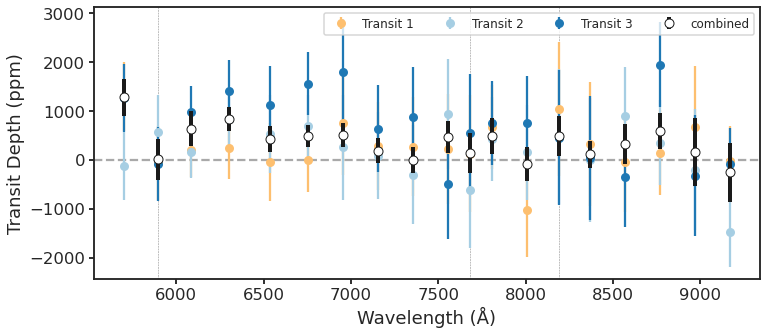

In [78]:
fig, ax = plt.subplots(figsize=FIG_WIDE)
utils.plot_tspec_IMACS(ax, base_dir, data_dict)

# Save
fig.tight_layout()
fig.set_size_inches(FIG_WIDE)
#utils.savefig(f"../paper/figures/tspec_full/tspec_full.pdf")
#utils.savefig("/home/mango/Desktop/tspecs.png", dpi=250)

In [74]:
np.average([3, 4 ,5], weights=[6, 7, 8])

4.095238095238095

In [49]:
for t in tspec:
    print(t)
    print()

     Depth (ppm)  Depthup (ppm)  DepthDown (ppm)
0   19911.759081     418.444192       497.723636
1   18557.339271     512.534321       552.926765
2   18812.233773     572.858809       578.335620
3   18859.108539     501.973978       543.357090
4   18576.150070     436.416422       467.630188
5   18615.615488     327.093800       327.778949
6   19380.336923     480.995122       394.661365
7   18903.931004     436.686769       423.603312
8   18891.123884     451.162974       447.148513
9   18845.680018     448.860798       479.020787
10  18744.002780     446.536139       451.322313
11  19283.147914    2452.355087      2533.455694
12  17593.208068     725.408487       677.600410
13  19661.463418    1549.813657      1666.014946
14  18941.288381     457.992010       524.038451
15  18566.171607     649.638231       702.095620
16  18763.458326     497.786535       613.506171
17  19299.394855    1034.875578      1005.331911
18  18595.345978    2345.732743      2169.649510

     Depth (ppm)  D

## Table

In [76]:
tspecs = pd.read_csv(f"{base_dir}/tspecs.csv", comment='#')
tspecs#.to_clipboard(index=False)

,Wavelength (Å),Transit 1,Transit 2,Transit 3,Combined
0,5600.0 - 5800.0,19900^{+400}_{-500},18500^{+2500}_{-2400},19900^{+600}_{-700},19895 \pm 374
1,5800.0 - 5985.8,18600^{+500}_{-600},19200^{+1300}_{-1400},18500^{+700}_{-800},18627 \pm 411
2,5985.8 - 6185.8,18800^{+600}_{-600},18800^{+1300}_{-1300},19600^{+400}_{-500},19258 \pm 358
3,6185.0 - 6420.0,18900^{+500}_{-500},19500^{+300}_{-300},20000^{+500}_{-600},19452 \pm 249
4,6420.0 - 6655.0,18600^{+400}_{-500},19100^{+300}_{-400},19700^{+700}_{-800},19042 \pm 265
5,6655.0 - 6855.0,18600^{+300}_{-300},19300^{+400}_{-300},20200^{+600}_{-600},19101 \pm 225
6,6855.0 - 7055.0,19400^{+500}_{-400},18900^{+300}_{-300},20400^{+1000}_{-1100},19122 \pm 242
7,7055.0 - 7255.0,18900^{+400}_{-400},18700^{+400}_{-300},19300^{+900}_{-900},18807 \pm 252
8,7255.0 - 7455.0,18900^{+500}_{-400},18300^{+300}_{-400},19500^{+1000}_{-900},18610 \pm 264
9,7455.0 - 7655.0,18800^{+400}_{-500},19600^{+500}_{-500},18100^{+1100}_{-1100},19080 \pm 327
